<b> Import Libraries </b>

In [2]:
!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import seaborn as sns
import wordcloud

import pandas as pd
import numpy as np

**Fetching Data**

In [6]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv'

df  = pd.read_csv(url)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [7]:
df.shape

(195, 39)

In [8]:
df.set_index('Country',inplace = True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


**Waffle Charts**

In [9]:
df_dsn = df.loc[['Denmark','Norway','Sweden'],:]
df_dsn.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [14]:
!pip install pywaffle

   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.6 MB ? eta -:--:--
    --------------------------------------- 0.5/25.6 MB 1.5 MB/s eta 0:00:17
   - -------------------------------------- 0.8/25.6 MB 1.3 MB/s eta 0:00:20
   - -------------------------------------- 1.0/25.6 MB 1.1 MB/s eta 0:00:22
   -- ------------------------------------- 1.3/25.6 MB 1.2 MB/s eta 0:00:21
   -- ------------------------------------- 1.6/25.6 MB 1.3 MB/s eta 0:00:19
   --- ------------------------------------ 2.1/25.6 MB 1.5 MB/s eta 0:00:17
   --- ------------------------------------ 2.4/25.6 MB 1.4 MB/s eta 0:00:17
   ---- ----------------------------------- 2.9/25.6 MB 1.5 MB/s eta 0:00:16
   ---- ----------------------------------- 3.1/25.6 MB 1.6 MB/s eta 0:00:15
   ----- ---------------------------------- 3.4/25.6 MB 1.5 MB/s eta 0:00:15
   ------ ----------


[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


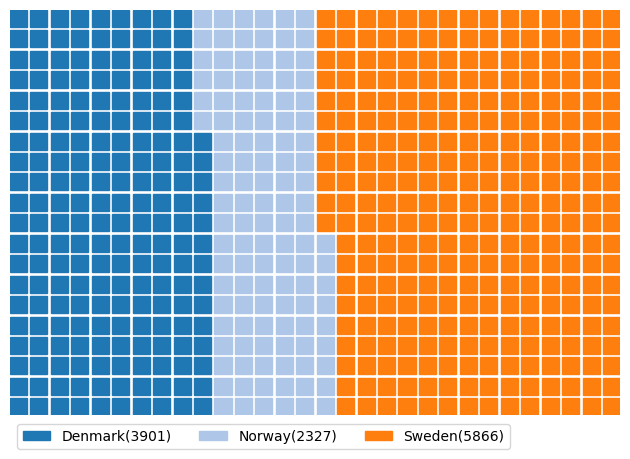

In [29]:
from pywaffle import  Waffle

fig = plt.figure(
    FigureClass=Waffle,
    rows = 20,
    columns = 30,
    values = df_dsn['Total'],
    cmap_name = 'tab20',
    legend = {'labels':[f"{k}({v})" for k,v in zip(df_dsn.index.values,df_dsn.Total)],
              'loc' : "lower left",
              'bbox_to_anchor':(0,-0.1),'ncol':3}
)

**Word Clouds**

In [30]:
from wordcloud import WordCloud , STOPWORDS

In [44]:
import urllib

# # open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [45]:
alice_novel

'\ufeffProject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and w

In [34]:
stopwords = set(STOPWORDS)

In [35]:
alice_wc = WordCloud()
alice_wc.generate(alice_novel)

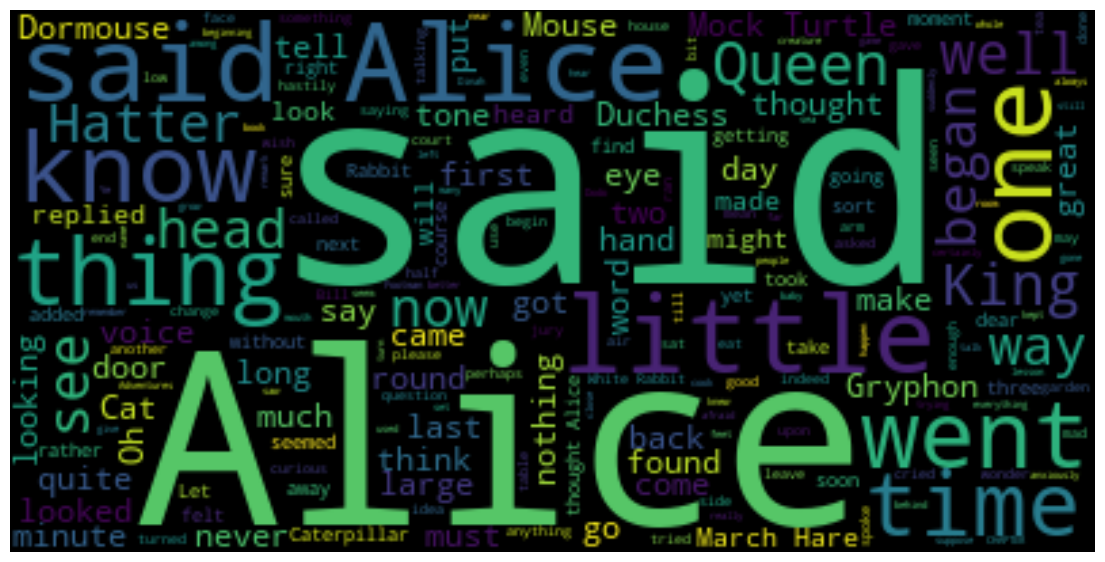

In [39]:
fig = plt.figure(figsize = (14,18))

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

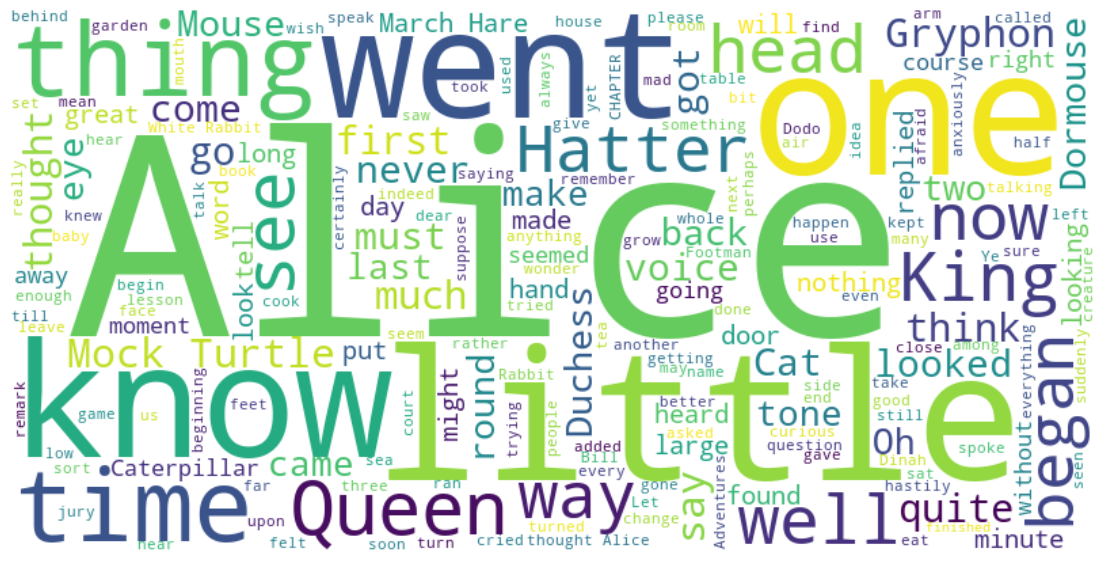

In [47]:
stopwords = set(STOPWORDS)
stopwords.add('said')
alice_wc = WordCloud(
    background_color='white',
    stopwords=stopwords,
    width = 800,
    height=400
)
alice_wc.generate(alice_novel)
fig = plt.figure(figsize = (14,18))

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [49]:
#save mask to alice_mask
from PIL import Image
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

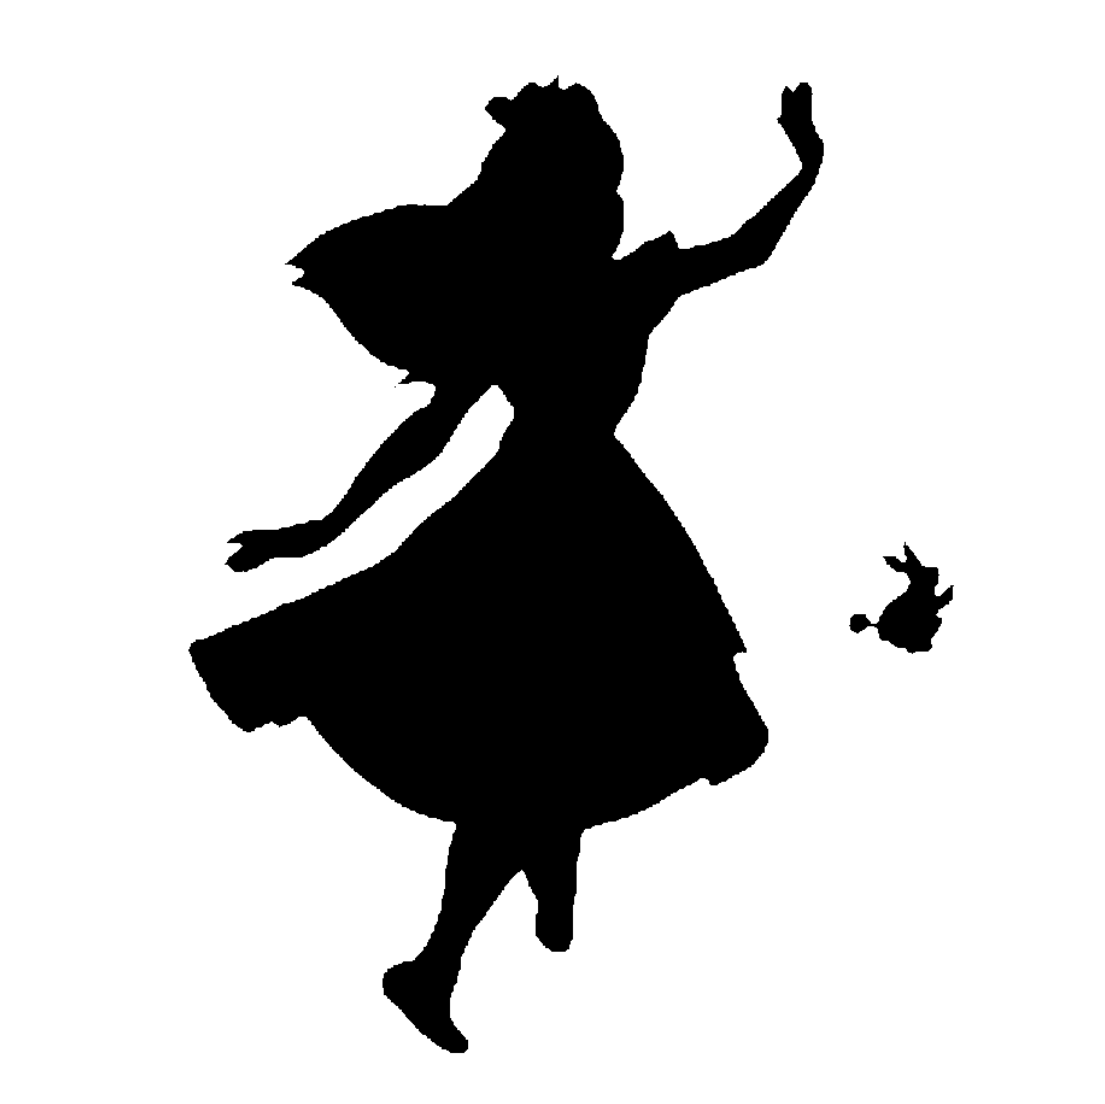

In [50]:
fig = plt.figure(figsize = (14,18))

plt.imshow(alice_mask,
           interpolation='bilinear',
           cmap = plt.cm.gray)
plt.axis('off')
plt.show()

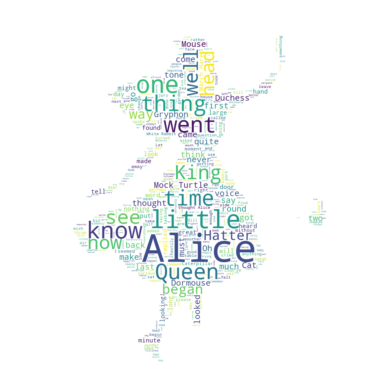

In [57]:
alice_wc = WordCloud(
    background_color='white',
    max_words = 2000,
    mask = alice_mask,
    stopwords = stopwords
)
alice_wc.generate(alice_novel)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [59]:
total_immigration = df['Total'].sum()
total_immigration

np.int64(6409153)

In [61]:
max_words = 90
word_string = ''
for country in df.index.values:
     # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

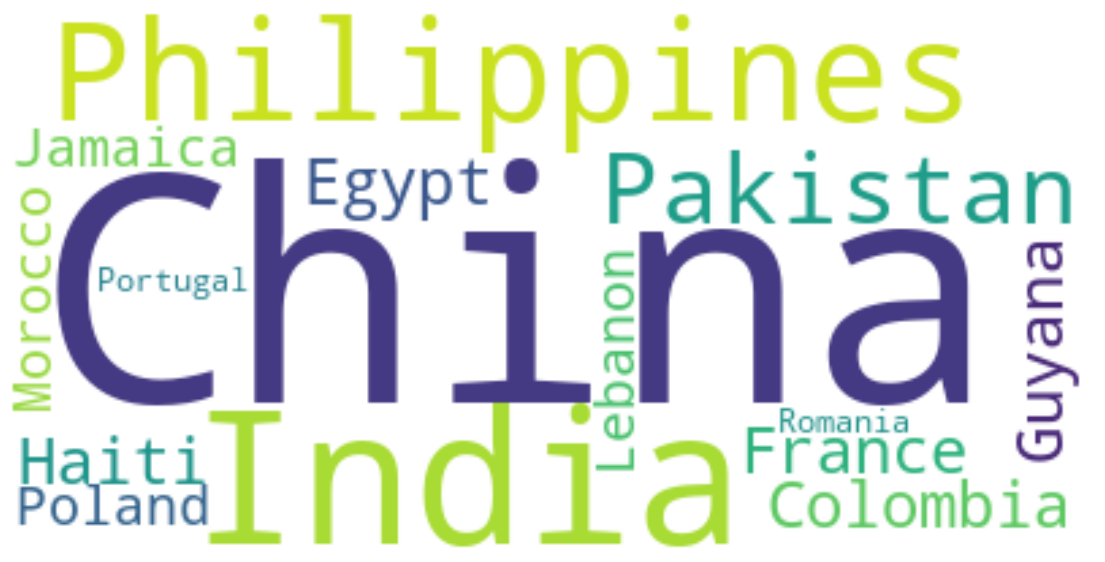

In [62]:
wc = WordCloud(
    background_color='white',
).generate(word_string)

plt.figure(figsize = (14,18))
plt.imshow(wc,
           interpolation='bilinear')
plt.axis('off')
plt.show()